In [ ]:
#Plot4 - Impacts of climate change on wheat breeding.

In [1]:
import pandas as pd
import numpy as np
#import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
from scipy import stats
%matplotlib inline

In [2]:
nursery=["ESWYT","IDYN","IWWYT_IRR","HTWYT","SAWYT","IWWYT_SA"]
out_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\0_Adaptation\\3_Results\AdaptedLinesAndSites\\"
fig_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\0_Adaptation\\6_Plots\\"
#fig, ax= plt.subplots(nrows=2,ncols=3,figsize=(9, 5),sharex=True,sharey=True)
    #for t in [1,2,3,4,5,6]:
result=pd.DataFrame(columns=['nursery','warming','index_wide_adaptation','index_selection_efficiency'])
for n in range(len(nursery)):
    df=pd.read_csv(out_dir+nursery[n]+"_woco2_Threshold.csv")
    for t in [0.26,1,2,3,4,5,6]:
        df1=df.iloc[1:df.shape[0],1:df.shape[1]].applymap(lambda x: 1 if x>t else 0)
        df1['nsite']=df1.sum(axis=1)
        #df1.loc['mean']=df1.mean()
        x=list(set(df1.nsite.tolist()))
        y=[df1.loc[:,'nsite'].apply(lambda x: 1 if x>i else 0).sum() for i in x]
        df2=pd.DataFrame()
        df2['site']=[100*t/(df.shape[1]-1) for t in x]
        df2['line']=[100*t/(df.shape[0]-1) for t in y]
        df2=df2[df2>0]
        df2=df2.dropna()
        wide_adaptation=sum(df2.site*(df2.line/df2.line.sum()))
        selection=sum(df2.line*(df2.site/df2.site.sum()))
        result.loc[len(result)]=[nursery[n],t,wide_adaptation,selection]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8092\1323927994.py:64: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.1,wspace=0.1)


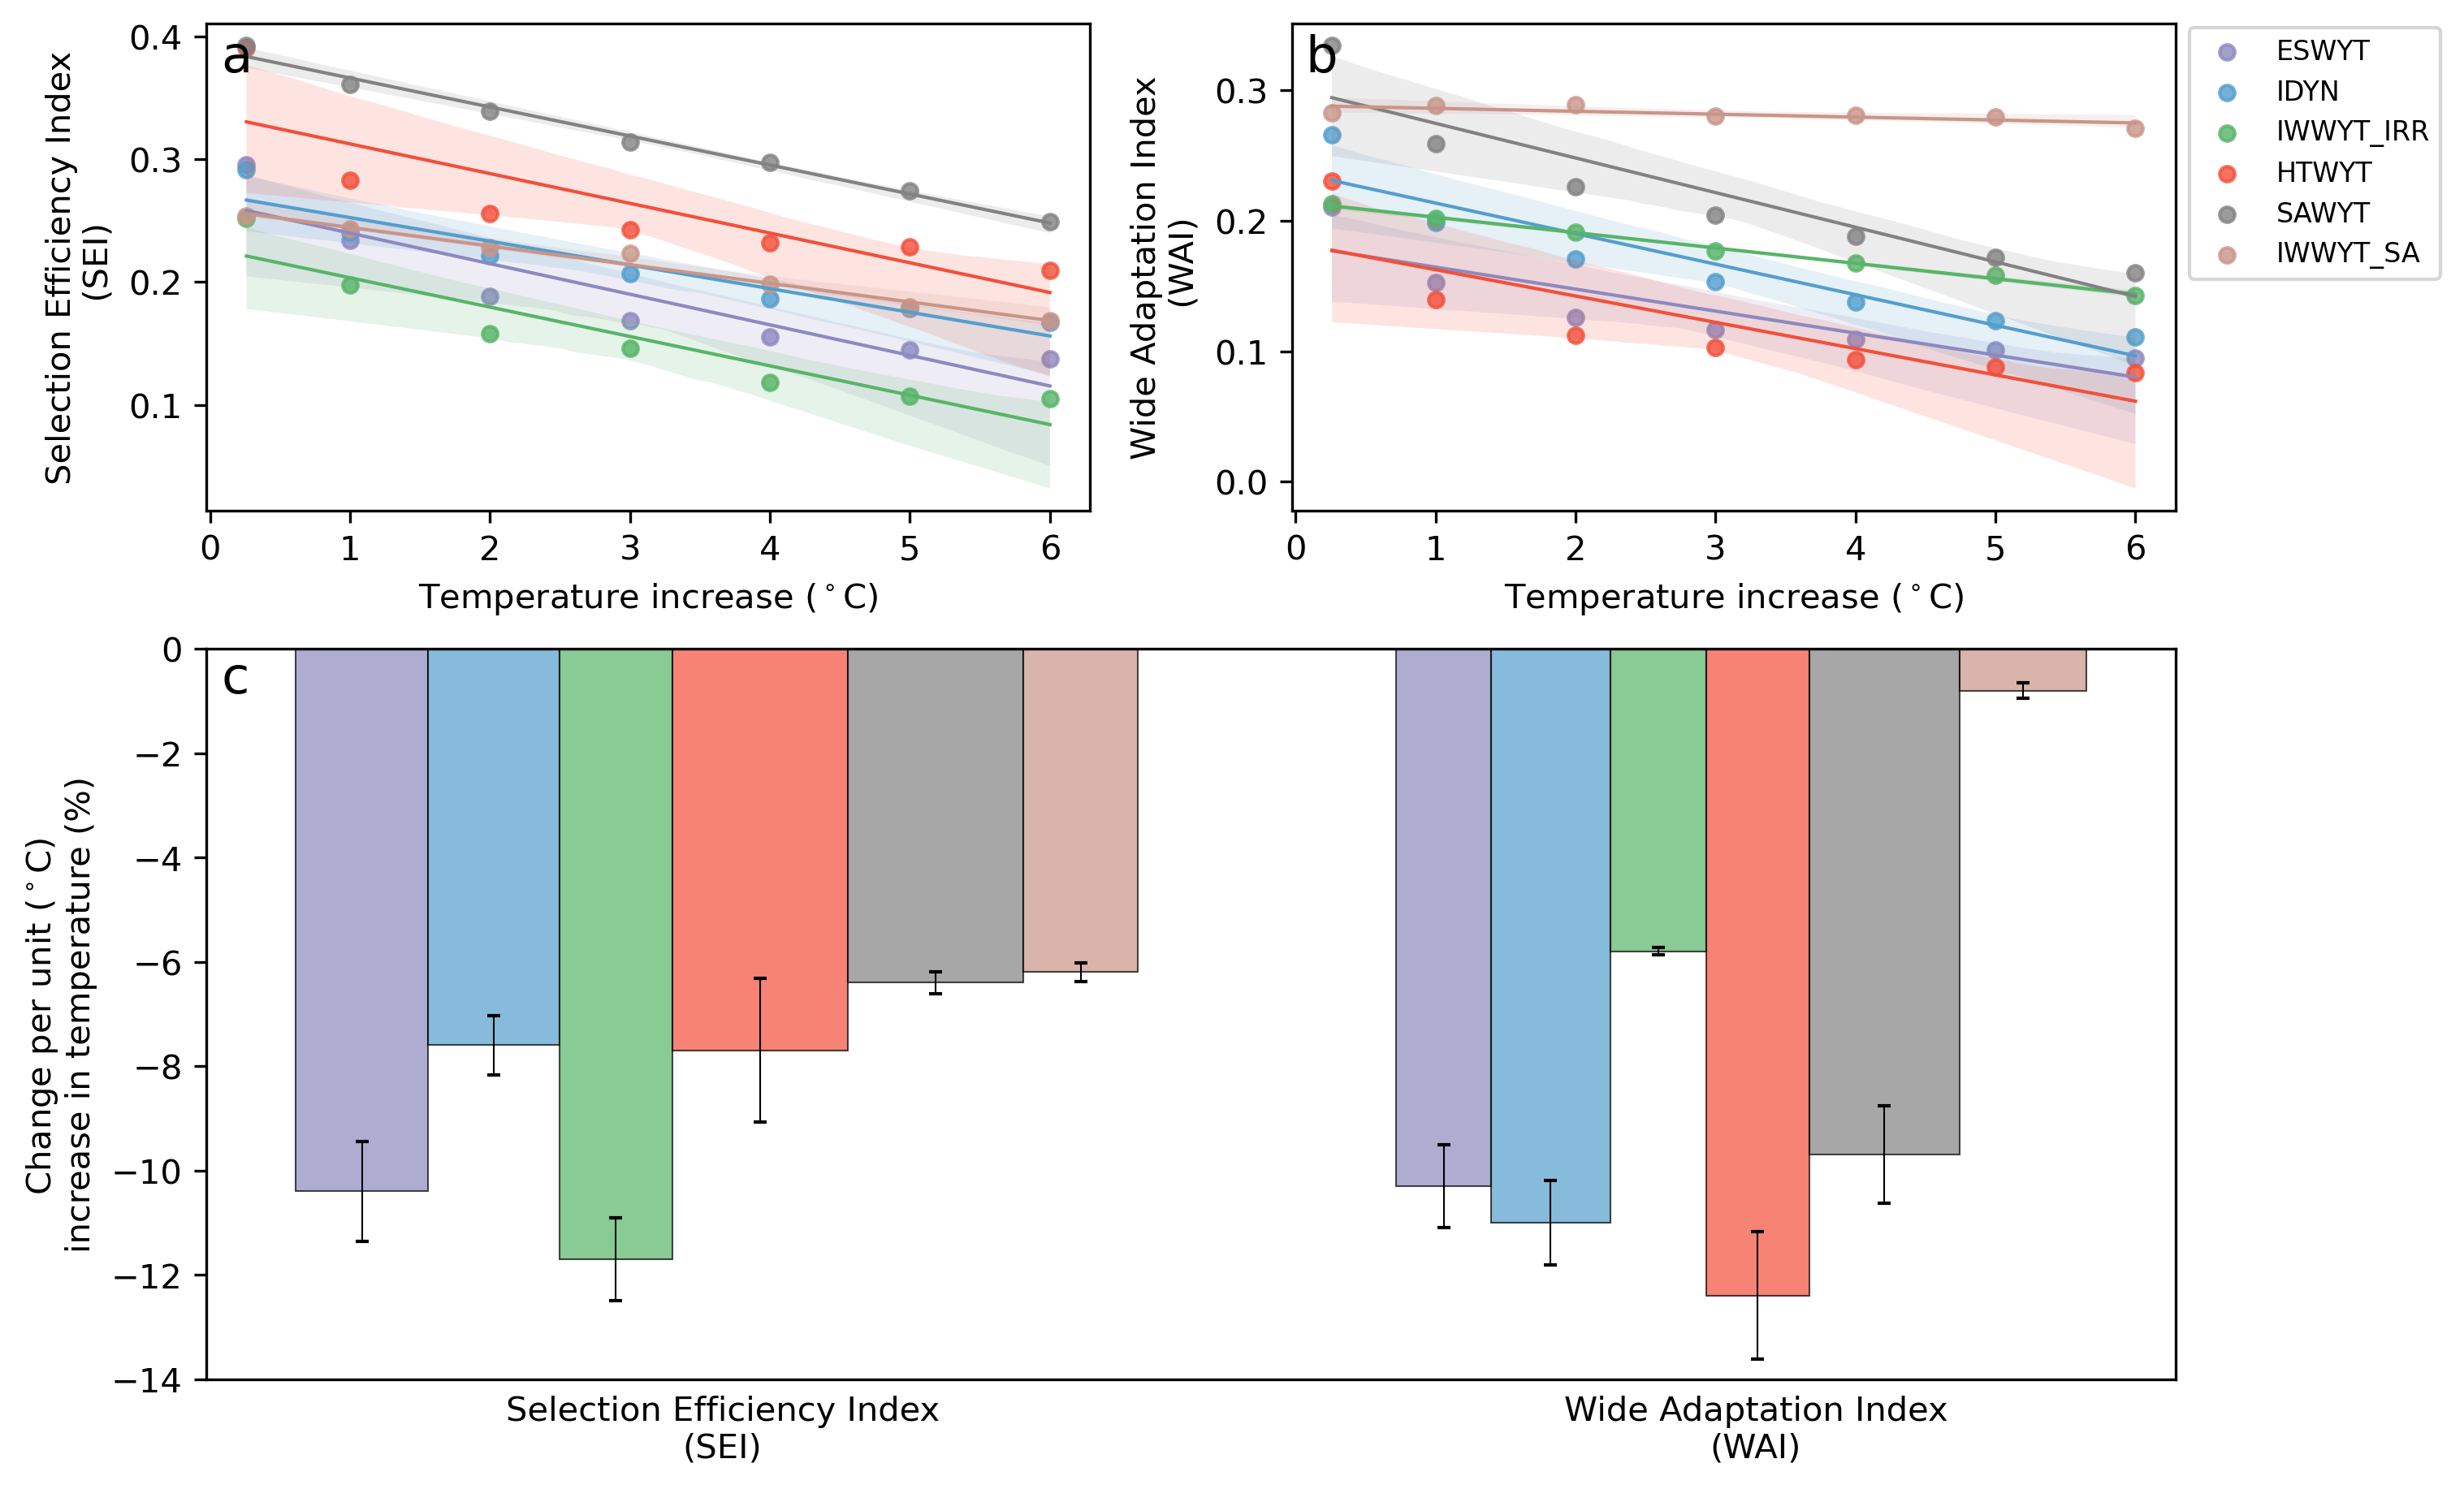

In [5]:
nursery_color=['Purples','Blues','Greens','Reds','Greys','pink_r']
new_color=[sns.color_palette(nursery_color[n], 6)[3] for n in range(6)]
fig=plt.figure(constrained_layout=True,figsize=(10,6),dpi=300)
gs=GridSpec(5,2,figure=fig,hspace=0,wspace=0)
#Site distribution and global wheat areas
ax = fig.add_subplot(gs[0:2,0])
for n in range(6):
    df=result[result.nursery==nursery[n]]
    sns.regplot(x=df.warming,y=df.index_selection_efficiency/100,ax=ax,color=new_color[n],line_kws={'lw': 1},scatter_kws={'s':20})
ax.set_xlabel('Temperature increase ($^\circ$C)',fontsize=10)
ax.set_ylabel('Selection Efficiency Index\n (SEI)',fontsize=10)

ax = fig.add_subplot(gs[0:2,1])
for n in range(6):
    df=result[result.nursery==nursery[n]]
    sns.regplot(x=df.warming,y=df.index_wide_adaptation/100,ax=ax,color=new_color[n],line_kws={'lw': 1},scatter_kws={'s':20},
               label=nursery[n])
ax.set_xlabel('Temperature increase ($^\circ$C)',fontsize=10)
ax.set_ylabel('Wide Adaptation Index\n (WAI)',fontsize=10)
ax.legend(ncol=1,fontsize=8,bbox_to_anchor=(1, 0.62, 0.06, 0.4))   
    
ax = fig.add_subplot(gs[2:,:])
output=pd.DataFrame(columns=['nursery','type','WDI','SEI','WDI_conf95','SEI_conf95'])
for n in range(len(nursery)):
    df=result[result.nursery==nursery[n]].reset_index()
    line=[nursery[n],'1degree']+df.iloc[0,3:].tolist()
    output.loc[len(output)]=line+['na','na']
    line1=[nursery[n],'1change']
    x=df.warming
    y=df.index_wide_adaptation
    slope, intercept, r_value, p_value, std_err1=stats.linregress(x,y)
    line1=line1+[round(100*slope/(slope+intercept),1)]
    y=df.index_selection_efficiency
    slope, intercept, r_value, p_value, std_err2=stats.linregress(x,y)
    line1=line1+[round(100*slope/(slope+intercept),1)]+[1.96*std_err1,1.96*std_err2]
    output.loc[len(output)]=line1

#plot 3
df=output[output.type=='1degree'].reset_index()
df1=output[output.type=='1change'].reset_index()
WDI=[0]+df.iloc[:,3].tolist()
x=[250+sum(WDI[:x])+WDI[x]/2 for x in range(1,7)]
ax.bar(x,df1.iloc[:,3],WDI[1:],color=new_color,edgecolor='black',
       yerr=df1.iloc[:,5],capsize=2,error_kw={'lw':0.5},linewidth=0.5,alpha=0.7)
#for x in range(1,7):
#    x_pos=250+sum(WDI[:x])+WDI[x]/7
#    ax.text(x_pos,-0.6,str(round(WDI[x]/100,2)),fontsize=8)
SEI=[0]+df.iloc[:,4].tolist()
x=[5+sum(SEI[:x])+SEI[x]/2 for x in range(1,7)]
ax.bar(x,df1.iloc[:,4],SEI[1:],color=new_color,edgecolor='black',
       yerr=df1.iloc[:,6],capsize=2,error_kw={'lw':0.5},linewidth=0.5,alpha=0.7)
#for x in range(1,7):
#    x_pos=5+sum(SEI[:x])+SEI[x]/5
#    ax.text(x_pos,-0.6,str(round(SEI[x]/100,2)),fontsize=8)
ax.set_ylim([-14,0])
#Add legend
ax.set_xticks([])
ax.set_ylabel('Change per unit ($^\circ$C) \nincrease in temperature (%)',fontsize=10)
ax.text(330,-15.5,'Wide Adaptation Index\n(WAI)',fontsize=10,horizontalalignment='center')
ax.text(100,-15.5,'Selection Efficiency Index\n(SEI)',fontsize=10,horizontalalignment='center')
plt.gcf().text(0.085,0.96,'a',fontsize=15)
plt.gcf().text(0.53,0.96,'b',fontsize=15)
plt.gcf().text(0.085,0.535,'c',fontsize=15)
plt.subplots_adjust(hspace=0.1,wspace=0.1)
fig.savefig(fig_dir+'Plot4_ChangeOfCC_4N.png',dpi=300,bbox_inches='tight')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8092\3878233604.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(1,2,1)


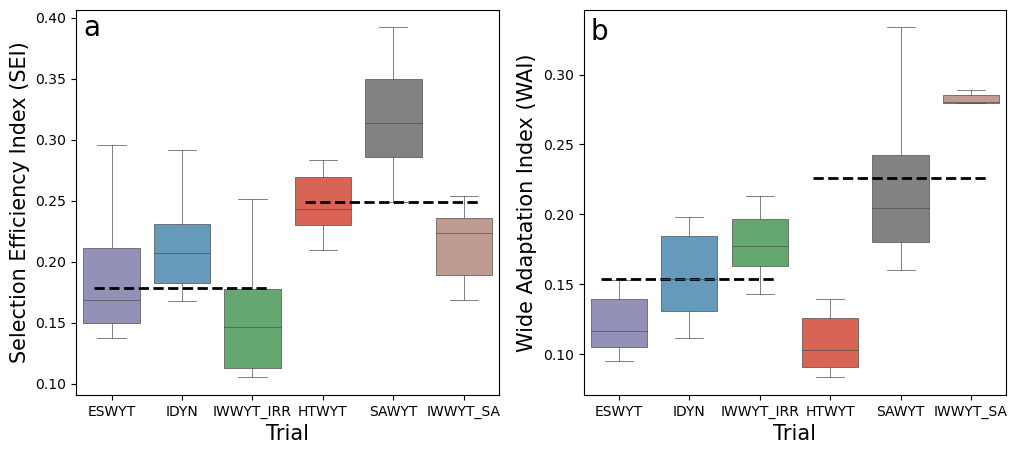

In [16]:
#Compare high-yilding and stressed
fig, ax= plt.subplots(figsize=(12,5))
ax=plt.subplot(1,2,1)
sns.boxplot(x=result.nursery, y=result.index_selection_efficiency/100, ax=ax,fliersize=0,palette=new_color,saturation=0.7,linewidth=0.5)
median_high,median_stress=result.iloc[:21,3].median()/100,result.iloc[21:,3].median()/100
ax.plot([-0.25, 2.25], [median_high,median_high], 'k--', lw=2)
plt.plot([2.75, 5.25], [median_stress, median_stress], 'k--', lw=2)
ax.set_ylabel("Selection Efficiency Index (SEI)", fontsize=15)
ax.set_xlabel("Trial",fontsize=15)
ax.text(-0.4,0.385,'a',fontsize=20)
ax=plt.subplot(1,2,2)
sns.boxplot(x=result.nursery, y=result.index_wide_adaptation/100, ax=ax,fliersize=0,palette=new_color,saturation=0.7,linewidth=0.5)
median_high,median_stress=result.iloc[:21,2].median()/100,result.iloc[21:,2].median()/100
ax.plot([-0.25, 2.25], [median_high,median_high], 'k--', lw=2)
plt.plot([2.75, 5.25], [median_stress, median_stress], 'k--', lw=2)
ax.set_ylabel("Wide Adaptation Index (WAI)", fontsize=15)
ax.set_xlabel("Trial",fontsize=15)
ax.text(-0.4,0.325,'b',fontsize=20)
fig.savefig(fig_dir+'Plot_S_ComparisonHighStress_4N.png',dpi=300,bbox_inches='tight')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8092\1988441417.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(4,1,f+1)


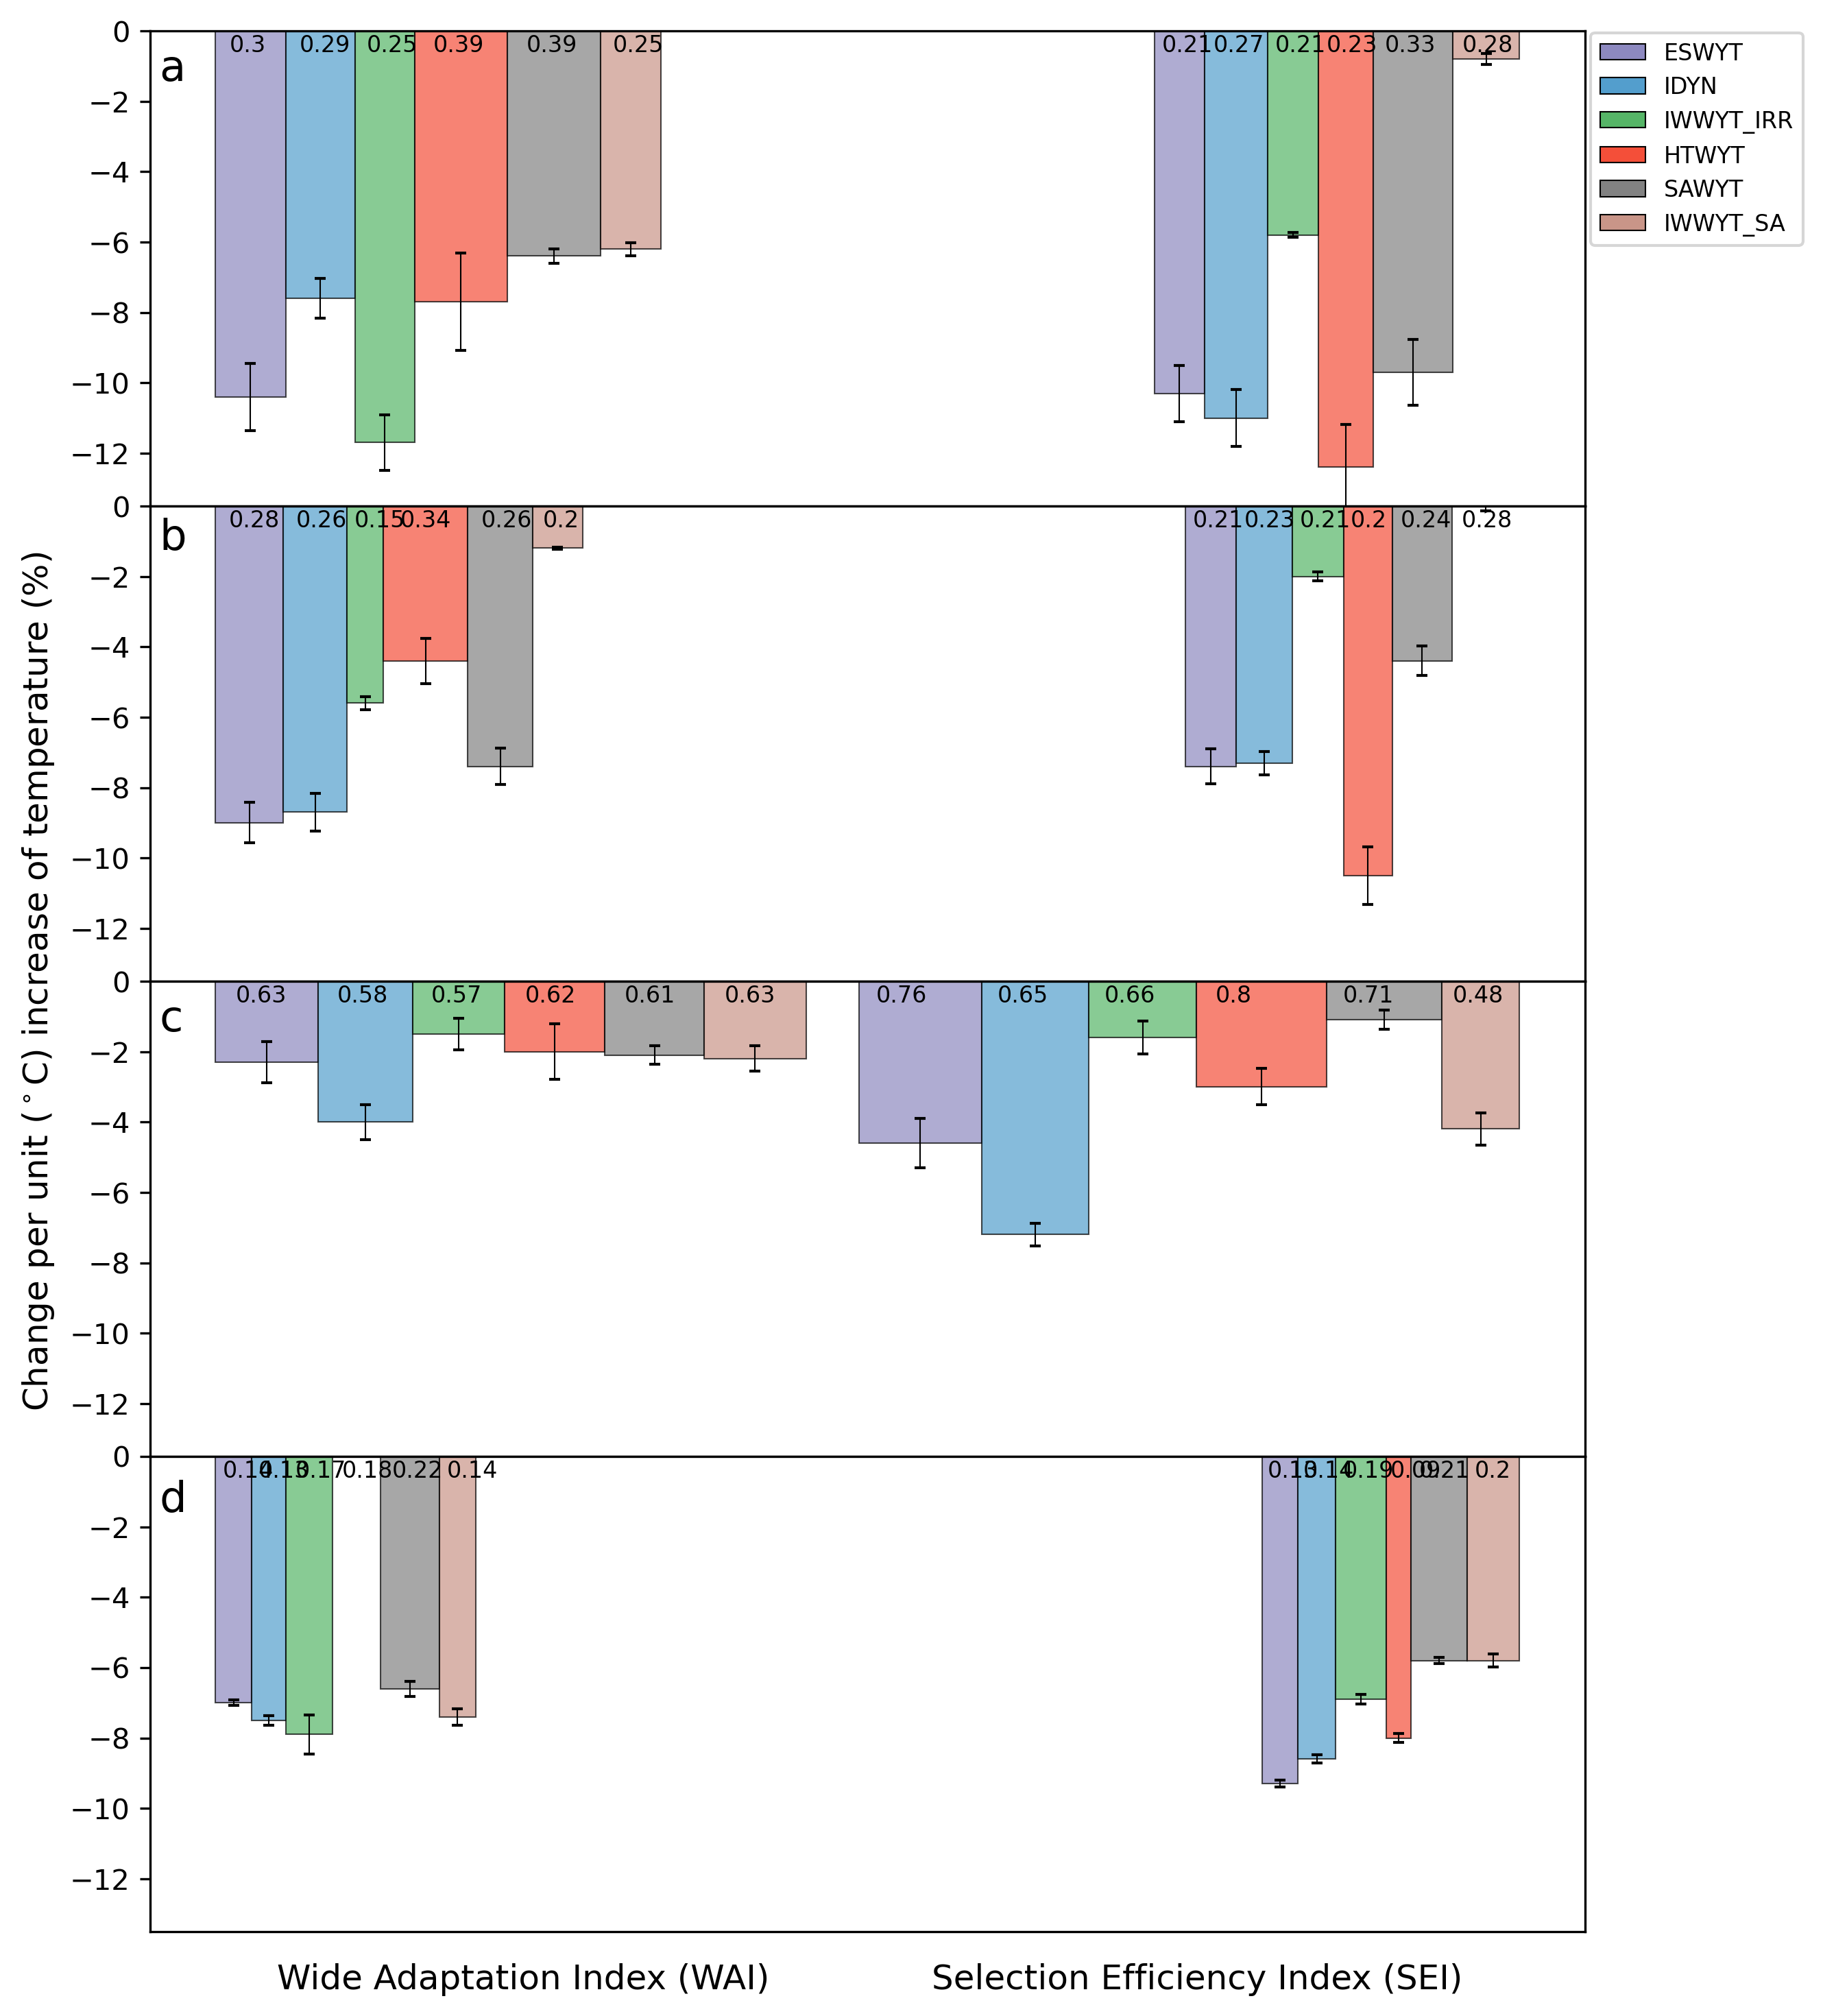

In [17]:
#Comparison between
nursery=["ESWYT","IDYN","IWWYT_IRR","HTWYT","SAWYT","IWWYT_SA"]
out_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\0_Adaptation\\3_Results\AdaptedLinesAndSites\\"
fig_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\0_Adaptation\\6_Plots\\"
#fig, ax= plt.subplots(nrows=2,ncols=3,figsize=(9, 5),sharex=True,sharey=True)
threshold=["_woco2_Threshold.csv","_woco2__nophetrend_Threshold.csv","_wco2_Threshold.csv","_18clivar_lasso_Threshold.csv"]
nursery_color=['Purples','Blues','Greens','Reds','Greys','pink_r']
new_color=[sns.color_palette(nursery_color[n], 6)[3] for n in range(6)]

fig, ax= plt.subplots(figsize=(9, 12),dpi=300,sharex=True,sharey=True)
for f in range(4):
    ax=plt.subplot(4,1,f+1)
    result=pd.DataFrame(columns=['nursery','warming','index_wide_adaptation','index_selection_efficiency'])
    for n in range(len(nursery)):
        df=pd.read_csv(out_dir+nursery[n]+threshold[f])
        for t in [0.26,1,2,3,4,5,6]:
            df1=df.iloc[1:df.shape[0],1:df.shape[1]].applymap(lambda x: 1 if x>t else 0)
            df1['nsite']=df1.sum(axis=1)
            #df1.loc['mean']=df1.mean()
            x=list(set(df1.nsite.tolist()))
            y=[df1.loc[:,'nsite'].apply(lambda x: 1 if x>i else 0).sum() for i in x]
            df2=pd.DataFrame()
            df2['site']=[100*t/(df.shape[1]-1) for t in x]
            df2['line']=[100*t/(df.shape[0]-1) for t in y]
            df2=df2[df2>0]
            df2=df2.dropna()
            wide_adaptation=sum(df2.site*(df2.line/df2.line.sum()))
            selection=sum(df2.line*(df2.site/df2.site.sum()))
            result.loc[len(result)]=[nursery[n],t,wide_adaptation,selection]

    output=pd.DataFrame(columns=['nursery','type','WDI','SEI','WDI_conf95','SEI_conf95'])
    for n in range(len(nursery)):
        df=result[result.nursery==nursery[n]].reset_index()
        line=[nursery[n],'1degree']+df.iloc[0,3:].tolist()
        output.loc[len(output)]=line+['na','na']
        line1=[nursery[n],'1change']
        x=df.warming
        y=df.index_wide_adaptation
        slope, intercept, r_value, p_value, std_err1=stats.linregress(x,y)
        line1=line1+[round(100*slope/(slope+intercept),1)]
        y=df.index_selection_efficiency
        slope, intercept, r_value, p_value, std_err2=stats.linregress(x,y)
        line1=line1+[round(100*slope/(slope+intercept),1)]+[1.96*std_err1,1.96*std_err2]
        output.loc[len(output)]=line1

    df=output[output.type=='1degree'].reset_index()
    df1=output[output.type=='1change'].reset_index()
    WDI=[0]+df.iloc[:,3].tolist()
    x=[400+sum(WDI[:x])+WDI[x]/2 for x in range(1,7)]
    ax.bar(x,df1.iloc[:,3],WDI[1:],color=new_color,edgecolor='black',linewidth=0.5,alpha=0.7,
            yerr=df1.iloc[:,5],capsize=2,error_kw={'lw':0.5})

    for x in range(1,7):
        x_pos=400+sum(WDI[:x])+WDI[x]/7
        plt.text(x_pos,-0.6,str(round(WDI[x]/100,2)),fontsize=8)
    SEI=[0]+df.iloc[:,4].tolist()
    x=[5+sum(SEI[:x])+SEI[x]/2 for x in range(1,7)]
    ax.bar(x,df1.iloc[:,4],SEI[1:],color=new_color,edgecolor='black',linewidth=0.5,alpha=0.7,
           yerr=df1.iloc[:,6],capsize=2,error_kw={'lw':0.5})

    for x in range(1,7):
        x_pos=5+sum(SEI[:x])+SEI[x]/5
        plt.text(x_pos,-0.6,str(round(SEI[x]/100,2)),fontsize=8)
    ax.set_ylim([-13.5,0])
    ax.set_xticks([])
#Add legend
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
handle=[]
for i in range(6): handle=handle+[mpatches.Patch(color=new_color[i],ec='black',lw=0.5,label=nursery[i])]
plt.legend(handles=handle,ncol=1,fontsize=8,bbox_to_anchor=(1.10, 0.605, 0.06, 0.4))
plt.gca().get_xaxis().set_visible(False)
plt.gcf().text(0.13,0.86,'a',fontsize=15)
plt.gcf().text(0.13,0.67,'b',fontsize=15)
plt.gcf().text(0.13,0.475,'c',fontsize=15)
plt.gcf().text(0.13,0.28,'d',fontsize=15)
plt.subplots_adjust(hspace=0)
plt.ylabel('Change per unit ($^\circ$C) increase of temperature (%)',fontsize=12,labelpad=10)
plt.text(0.26,-0.03,'Wide Adaptation Index (WAI)',fontsize=12,horizontalalignment='center')
plt.text(0.73,-0.03,'Selection Efficiency Index (SEI)',fontsize=12,horizontalalignment='center')
fig.savefig(fig_dir+'Plot_S_ChangeOfCC_comparison_4N.png',dpi=300,bbox_inches='tight')

In [75]:
#output['changeWDI']=(output1.WDI-output.WDI)/output.WDI
output['WDIchange']=100*(output1.WDI-output.WDI)/output.WDI
output['SEIchange']=100*(output1.SEI-output.SEI)/output.SEI
output[output.type=='1change']

,nursery,type,WDI,SEI,WDIchange,SEIchange
1,ESWYT,1change,-10.7,-10.7,-27.102804,-16.822430
3,IDYN,1change,-11.4,-8.0,-33.333333,16.250000
5,IWWYT_IRR,1change,-6.2,-12.2,-69.354839,-53.278689
7,HTWYT,1change,-13.6,-7.1,-19.852941,-26.760563
9,SAWYT,1change,-9.8,-6.6,-51.020408,13.636364
11,IWWYT_SA,1change,-0.7,-6.2,-114.285714,-80.645161


In [85]:
output[output.type=='1degree']

,nursery,type,WDI,SEI
0,ESWYT,1degree,75.771326,63.024773
2,IDYN,1degree,65.344098,58.265909
4,IWWYT_IRR,1degree,66.175104,56.565759
6,HTWYT,1degree,80.003257,61.504571
8,SAWYT,1degree,70.520507,60.895580
10,IWWYT_SA,1degree,47.887239,62.647082


In [77]:
output1[output1.type=='1change']

,nursery,type,WDI,SEI
1,ESWYT,1change,-7.8,-8.9
3,IDYN,1change,-7.6,-9.3
5,IWWYT_IRR,1change,-1.9,-5.7
7,HTWYT,1change,-10.9,-5.2
9,SAWYT,1change,-4.8,-7.5
11,IWWYT_SA,1change,0.1,-1.2
